<a href="https://colab.research.google.com/github/Ghoniem/Neoscholar/blob/main/Book/IdealRankine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 46.7 MB/s eta 0:00:00
Rankine Cycle Analysis
State 1: h1 = 417.50 kJ/kg, s1 = 1.3028 kJ/kg.K
State 2: h2 = 422.61 kJ/kg, s2 = 1.3028 kJ/kg.K, T2 = 99.94 °C
State 2_prime: h2_prime = 1154.64 kJ/kg, s2_prime = 2.9210 kJ/kg.K
State 3: h3 = 2794.21 kJ/kg, s3 = 5.9737 kJ/kg.K
State 4: h4 = 2158.61 kJ/kg, s4 = 5.9737 kJ/kg.K
Turbine Work (wturb): 635.59 kJ/kg
Pump Work (wpump): 5.11 kJ/kg
Heat Added (qin): 2371.60 kJ/kg
Heat Rejected (qout): -1741.11 kJ/kg
Net Work (wnet): 630.49 kJ/kg
Thermal Efficiency (eta): 26.58%


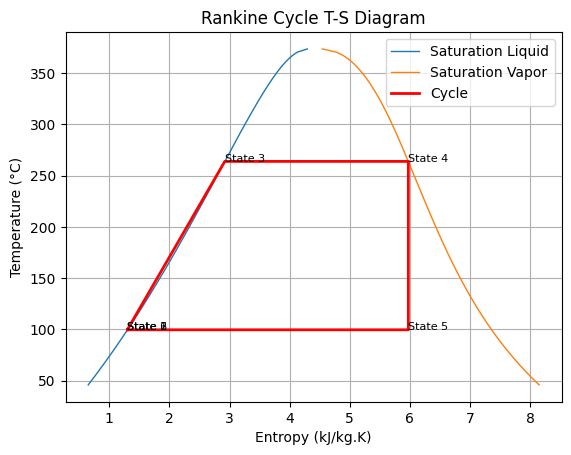

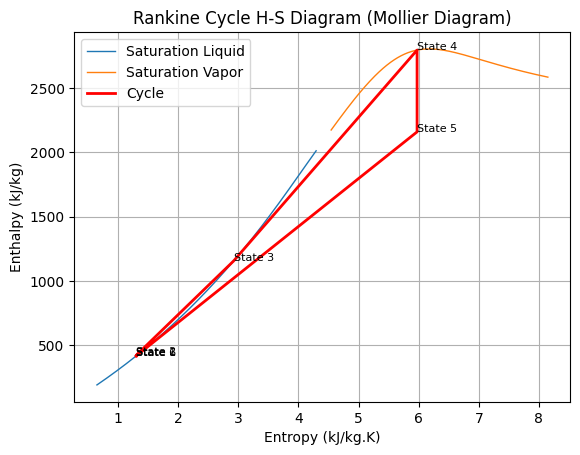

In [3]:
%pip install CoolProp
from CoolProp.CoolProp import PropsSI
import matplotlib.pyplot as plt
import numpy as np

def rankine_cycle_analysis():
    """
    Perform calculations for the ideal Rankine cycle, including:
    1. Specific work of turbine and pump.
    2. Heat added (qin) and rejected (qout).
    3. Net work (wnet) and thermal efficiency (eta).
    Generate T-S and H-S diagrams with saturation dome and cycle curves.
    """

    # Define state points (pressures in Pa, temperatures in K)
    P1 = 100000  # Condenser pressure (Pa)
    P2 = 5000000  # Boiler pressure (Pa)
    T3 = 773.15  # Turbine inlet temperature (K)
    Pcrit = 22e6
    dome_p2 = Pcrit
    dome_p1 = 1e4
    # State 1: Saturated liquid at P1
    h1 = PropsSI('H', 'P', P1, 'Q', 0, 'Water')  # Enthalpy (J/kg)
    s1 = PropsSI('S', 'P', P1, 'Q', 0, 'Water')  # Entropy (J/kg.K)

    # State 2: Compressed liquid (isentropic process)
    s2 = s1  # Isentropic process
    h2 = PropsSI('H', 'P', P2, 'S', s2, 'Water')
    T2 = PropsSI('T', 'P', P2, 'S', s2, 'Water')

    # State 2_prime: Saturated liquid at P2
    h2_prime = PropsSI('H', 'P', P2, 'Q', 0, 'Water')
    s2_prime = PropsSI('S', 'P', P2, 'Q', 0, 'Water')

    # State 3: Superheated vapor
    h3 = PropsSI('H', 'P', P2, 'Q', 1,  'Water')  # Enthalpy (J/kg)
    s3 = PropsSI('S', 'P', P2, 'Q', 1, 'Water')

    # State 4: Saturated mixture (isentropic expansion)
    s4 = s3  # Isentropic process
    h4 = PropsSI('H', 'P', P1, 'S', s4, 'Water')

    # Work and heat calculations
    wturb = h3 - h4  # Work done by the turbine (J/kg)
    wpump = h2 - h1  # Work done by the pump (J/kg)
    qin = h3 - h2  # Heat added in the boiler (J/kg)
    qout = h1 - h4  # Heat rejected in the condenser (J/kg)

    # Net work and thermal efficiency
    wnet = wturb - wpump  # Net work (J/kg)
    eta = wnet / qin  # Thermal efficiency

    # Display results
    print("Rankine Cycle Analysis")
    print(f"State 1: h1 = {h1 / 1000:.2f} kJ/kg, s1 = {s1 / 1000:.4f} kJ/kg.K")
    print(f"State 2: h2 = {h2 / 1000:.2f} kJ/kg, s2 = {s2 / 1000:.4f} kJ/kg.K, T2 = {T2 - 273.15:.2f} °C")
    print(f"State 2_prime: h2_prime = {h2_prime / 1000:.2f} kJ/kg, s2_prime = {s2_prime / 1000:.4f} kJ/kg.K")
    print(f"State 3: h3 = {h3 / 1000:.2f} kJ/kg, s3 = {s3 / 1000:.4f} kJ/kg.K")
    print(f"State 4: h4 = {h4 / 1000:.2f} kJ/kg, s4 = {s4 / 1000:.4f} kJ/kg.K")
    print(f"Turbine Work (wturb): {wturb / 1000:.2f} kJ/kg")
    print(f"Pump Work (wpump): {wpump / 1000:.2f} kJ/kg")
    print(f"Heat Added (qin): {qin / 1000:.2f} kJ/kg")
    print(f"Heat Rejected (qout): {qout / 1000:.2f} kJ/kg")
    print(f"Net Work (wnet): {wnet / 1000:.2f} kJ/kg")
    print(f"Thermal Efficiency (eta): {eta * 100:.2f}%")

    # Generate T-S Diagram
    s_sat_liquid = []
    t_sat_liquid = []
    s_sat_vapor = []
    t_sat_vapor = []

    for p in np.logspace(np.log10(dome_p1), np.log10(dome_p2), 200):
        s_sat_liquid.append(PropsSI('S', 'P', p, 'Q', 0, 'Water'))
        t_sat_liquid.append(PropsSI('T', 'P', p, 'Q', 0, 'Water'))
        s_sat_vapor.append(PropsSI('S', 'P', p, 'Q', 1, 'Water'))
        t_sat_vapor.append(PropsSI('T', 'P', p, 'Q', 1, 'Water'))

    plt.figure()
    # Saturation dome
    plt.plot([s / 1000 for s in s_sat_liquid], [t - 273.15 for t in t_sat_liquid], label="Saturation Liquid", linestyle="-", linewidth=1)
    plt.plot([s / 1000 for s in s_sat_vapor], [t - 273.15 for t in t_sat_vapor], label="Saturation Vapor", linestyle="-", linewidth=1)

    # Cycle curve
    cycle_s = [s1, s2, s2_prime, s3, s4, s1]
    cycle_t = [PropsSI('T', 'P', P1, 'Q', 0, 'Water') - 273.15, T2 - 273.15, PropsSI('T', 'P', P2, 'Q', 0, 'Water') - 273.15,
               PropsSI('T', 'P', P2, 'Q', 1, 'Water') - 273.15, PropsSI('T', 'P', P1, 'Q', 0, 'Water') - 273.15, PropsSI('T', 'P', P1, 'Q', 0, 'Water') - 273.15]
    plt.plot([s / 1000 for s in cycle_s], cycle_t, label="Cycle", linewidth=2, color="red")

    # Label states
    for i, (s, t) in enumerate(zip(cycle_s, cycle_t), start=1):
        plt.text(s / 1000, t, f"State {i}", fontsize=8)

    plt.xlabel("Entropy (kJ/kg.K)")
    plt.ylabel("Temperature (°C)")
    plt.title("Rankine Cycle T-S Diagram")
    ylim = 500
    plt.legend()
    plt.grid()
    plt.show()

    # Generate H-S Diagram (Mollier Diagram)
    h_sat_liquid = []
    s_sat_liquid = []
    h_sat_vapor = []
    s_sat_vapor = []

    for p in np.logspace(np.log10(dome_p1), np.log10(dome_p2), 500):
        h_sat_liquid.append(PropsSI('H', 'P', p, 'Q', 0, 'Water'))
        s_sat_liquid.append(PropsSI('S', 'P', p, 'Q', 0, 'Water'))
        h_sat_vapor.append(PropsSI('H', 'P', p, 'Q', 1, 'Water'))
        s_sat_vapor.append(PropsSI('S', 'P', p, 'Q', 1, 'Water'))

    plt.figure()
    # Saturation dome
    plt.plot([s / 1000 for s in s_sat_liquid], [h / 1000 for h in h_sat_liquid], label="Saturation Liquid", linestyle="-", linewidth=1)
    plt.plot([s / 1000 for s in s_sat_vapor], [h / 1000 for h in h_sat_vapor], label="Saturation Vapor", linestyle="-", linewidth=1)

    # Cycle curve
    cycle_h = [h1, h2, h2_prime, h3, h4, h1]
    cycle_s = [s1, s2, s2_prime, s3, s4, s1]
    plt.plot([s / 1000 for s in cycle_s], [h / 1000 for h in cycle_h], label="Cycle", linewidth=2, color="red")

    # Label states
    for i, (s, h) in enumerate(zip(cycle_s, cycle_h), start=1):
        plt.text(s / 1000, h / 1000, f"State {i}", fontsize=8)

    plt.xlabel("Entropy (kJ/kg.K)")
    plt.ylabel("Enthalpy (kJ/kg)")
    plt.title("Rankine Cycle H-S Diagram (Mollier Diagram)")
    plt.legend()
    plt.grid()
    plt.show()

rankine_cycle_analysis()
